# Week 9
# Plotting with Matplotlib
1. Create subplots
2. Adjust ticks, legends, labels
3. Add annotations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download Bitcoin trading data
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
BTC = pd.DataFrame(json.loads(res.content)['Data'])

# Use time as index
BTC = BTC.set_index('time')
BTC.index = pd.to_datetime(BTC.index, unit='s')

BTC.tail(3)# 

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2023-04-01,28810.95,28265.42,28477.29,19774.03,5.632994e+08,28465.30,direct,
2023-04-02,28538.36,27880.95,28465.30,21016.25,5.925811e+08,28186.76,direct,
2023-04-03,28494.64,27604.93,28186.76,29809.63,8.374696e+08,28032.66,direct,


In [3]:
# Install yahoo finance library
!pip install --upgrade pip
!pip install yfinance

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ch002\anaconda3\python.exe -m pip install --upgrade pip


In [4]:
import yfinance as yf

SPY = yf.download('SPY', start="2017-09-29")
SPY.tail(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-30,404.089996,404.350006,401.760010,403.700012,403.700012,69840000
2023-03-31,404.660004,409.700012,404.549988,409.390015,409.390015,111974600
2023-04-03,408.850006,411.369995,408.440002,408.919891,408.919891,23266905


## 1. Four plots on the price change
- Scatter plot
- Histogram

Text(0.5, 1.0, 'S&P 500 Index')

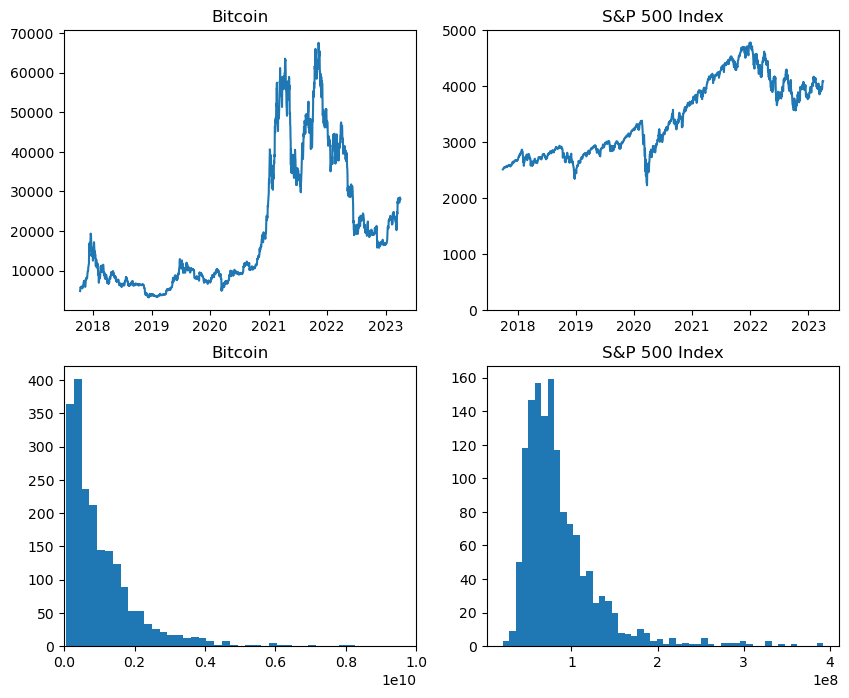

In [5]:
fig = plt.figure(figsize=(10, 8))

# Add axes for the first subplot
ax1 = fig.add_subplot(2, 2, 1) # What do these numbers mean?
                               # (number of rows, number of columns, the index of this particular plot)

# plot BTC price change (close price vs. time)
ax1.plot(BTC.index, BTC['close'])
ax1.set_title("Bitcoin")

# Add axes for the second subplot
ax2 = fig.add_subplot(2, 2, 2)

# plot SPY price change (close price vs. time)
ax2.plot(SPY.index, SPY['Close'] * 10)
ax2.set_title("S&P 500 Index")
ax2.set_ylim([0, 5000])

# The third subplot
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(BTC['volumeto'], bins=50)
ax3.set_title("Bitcoin")
ax3.set_xlim([0, 1e10])

# The fourth subplot
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(SPY['Volume'], bins=50)
ax4.set_title("S&P 500 Index")
# ax4.set_xlim([0, 1e10])

## 2 Ticks, labels, and legends

(2500.0, 15000.0)

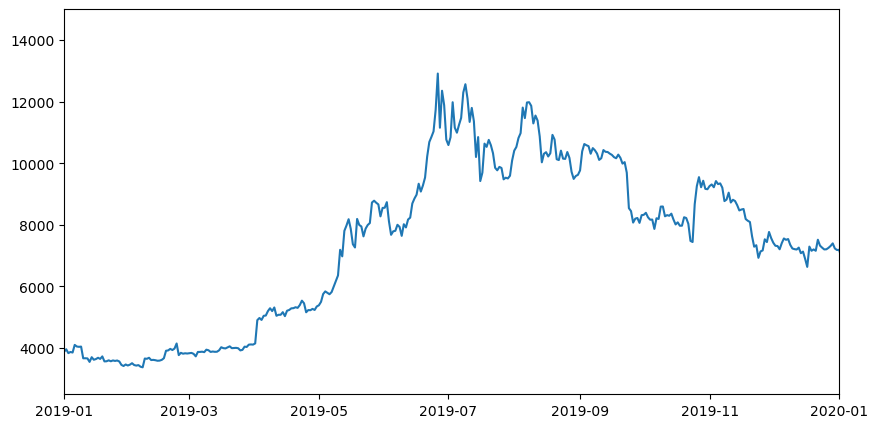

In [6]:
# Specify limits on the x-axis and y-axis
from datetime import datetime

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
plt.ylim([2500, 15000])

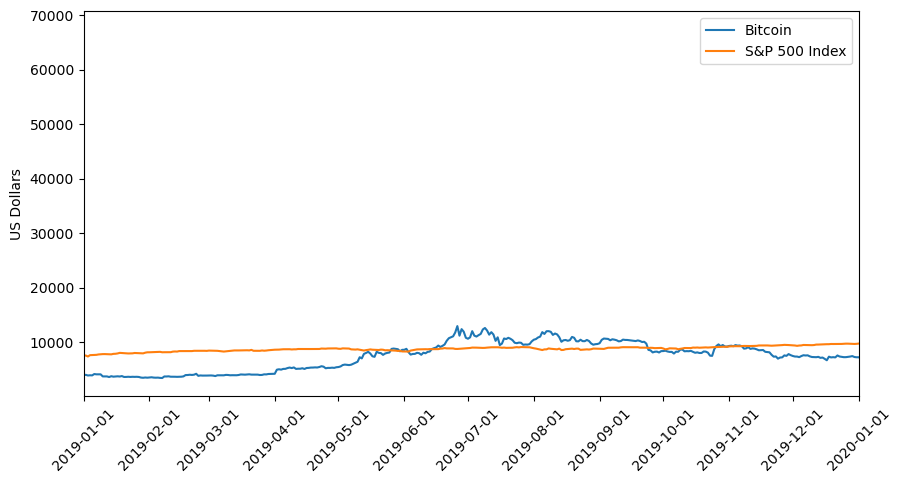

In [7]:
# Show ticks for every month
plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.plot(SPY.index, SPY['Close'] * 30)
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
ticks = [datetime(2019, x, 1) for x in range(1, 13)]
ticks.append(datetime(2020, 1, 1))
plt.xticks(ticks, rotation=45)

# Add y label
plt.ylabel("US Dollars")

# Add legned
plt.legend(['Bitcoin', 'S&P 500 Index'])

plt.show()

## 3. Add Annotations

Maximum close price: 19345.49
Index of the maximum price: 2017-12-16 00:00:00
Start date: 2017-10-11 00:00:00


Text(2017-08-01 00:00:00, 25000, 'Bitcoin price increased 5 times within 200 days')

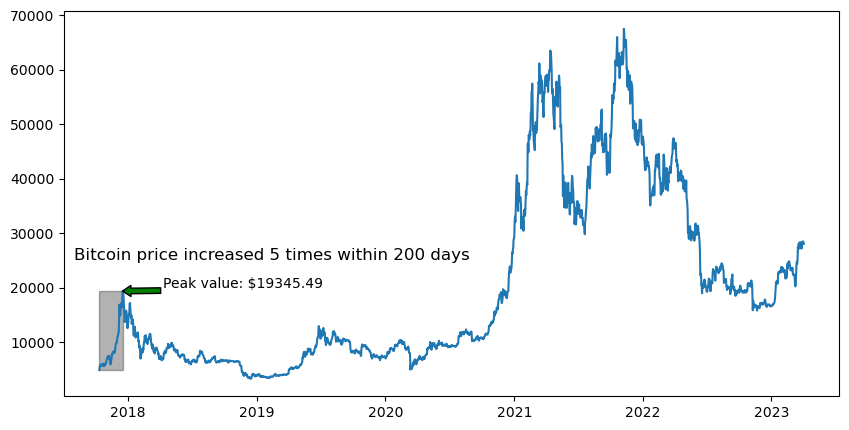

In [26]:
from datetime import timedelta

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])

# # Point out the peak value
# plt.annotate('Peak value: 19000',
#              xy=(datetime(2017, 12, 16), 19345.49),
#              xytext=(datetime(2018, 1, 1)+timedelta(days=100), 20000),
#              arrowprops=dict(facecolor='green', headwidth=8, width=4, headlength=6))

# Let's improve the annotation by finding the exact peak point.
sub_data = BTC[(BTC.index >= datetime(2017, 12, 1)) & \
               (BTC.index <= datetime(2018, 2, 1))]
# sub_data.tail()
# sub_data.describe()
max_close_price = sub_data['close'].max()
print("Maximum close price:", max_close_price) # 19345.49
max_close_index = sub_data['close'].idxmax()
print("Index of the maximum price:", max_close_index) # 2017-12-16

# Let's create the annotation again
# Point out the peak value
plt.annotate('Peak value: $%.2f' % max_close_price,
             xy=(max_close_index, max_close_price),
             xytext=(datetime(2018, 1, 1)+timedelta(days=100), 20000),
             arrowprops=dict(facecolor='green', headwidth=8, width=4, headlength=6))


# Highlight the dramatic increase in 2018
start_date = BTC.index[0]
start_price = BTC.loc[start_date, 'close']
print("Start date:", start_date)
rectangle = plt.Rectangle((start_date, start_price),
                          (max_close_index - start_date),
                          (max_close_price - start_price),
                          color='k',
                          alpha=0.3)
plt.gca().add_patch(rectangle)

# Add text description
plt.text(datetime(2017, 8, 1),
         25000,
         "Bitcoin price increased 5 times within 200 days",
         fontsize=12)